In [101]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans
from timeit import timeit
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [102]:
df_num = pd.read_csv('./df_num.csv')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [103]:
columns_to_drop = [
    'StreamingMovies_No internet service',
    'StreamingTV_No internet service',
    'TechSupport_No internet service',
    'DeviceProtection_No internet service',
    'OnlineBackup_No internet service',
    'OnlineSecurity_No internet service',
    'MultipleLines_No phone service'
]

# Eliminar las columnas del DataFrame
df_num = df_num.drop(columns=columns_to_drop)

# Verificar que las columnas han sido eliminadas
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

In [104]:
# Separar según el valor de 'Churn'
df_churn_positive = df_num[df_num['Churn'] == 1]  # Churn positivo
df_churn_negative = df_num[df_num['Churn'] == 0]  # Churn negativo

print("Clientes con Churn positivo:", df_churn_positive.shape)
print("Clientes con Churn negativo:", df_churn_negative.shape)

Clientes con Churn positivo: (1869, 25)
Clientes con Churn negativo: (5174, 25)


In [105]:
df_churn_positive['TotalCharges'].sum()

np.float64(2862926.9)

In [106]:
df_churn_negative['TotalCharges'].sum()

np.float64(13208614.025)

In [107]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)       # Ajustar el ancho de la visualización
pd.set_option('display.max_rows', None) 

In [108]:
print(df_churn_positive.describe())

       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    1869.000000  1869.000000  1869.000000  1869.000000   1869.000000   
mean        0.254682     0.357945     0.174425    17.979133      0.909042   
std         0.435799     0.479524     0.379576    19.531123      0.287626   
min         0.000000     0.000000     0.000000     1.000000      0.000000   
25%         0.000000     0.000000     0.000000     2.000000      1.000000   
50%         0.000000     0.000000     0.000000    10.000000      1.000000   
75%         1.000000     1.000000     0.000000    29.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges   Churn  gender_Male  \
count       1869.000000     1869.000000   1869.000000  1869.0  1869.000000   
mean           0.749064       74.441332   1531.796094     1.0     0.497592   
std            0.433668       24.666053   1890.822994     0.0     0.5001

In [109]:
print(df_churn_negative.describe())

       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    5174.000000  5174.000000  5174.000000  5174.000000   5174.000000   
mean        0.128721     0.528218     0.344801    37.569965      0.901044   
std         0.334923     0.499251     0.475349    24.113777      0.298632   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000    15.000000      1.000000   
50%         0.000000     1.000000     0.000000    38.000000      1.000000   
75%         0.000000     1.000000     1.000000    61.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges   Churn  gender_Male  \
count       5174.000000     5174.000000   5174.000000  5174.0  5174.000000   
mean           0.535562       61.265124   2552.882494     0.0     0.507344   
std            0.498782       31.092648   2327.590132     0.0     0.4999

<h1>Positive Churn</h1>

In [110]:
churn_positive = df_churn_positive.drop(columns=['Churn'])

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(churn_positive)

In [112]:
# Elbow
sse = []  # Suma de los errores al cuadrado
range_n_clusters = range(2, 11) 
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

<h2>KMeans Elbow</h2>

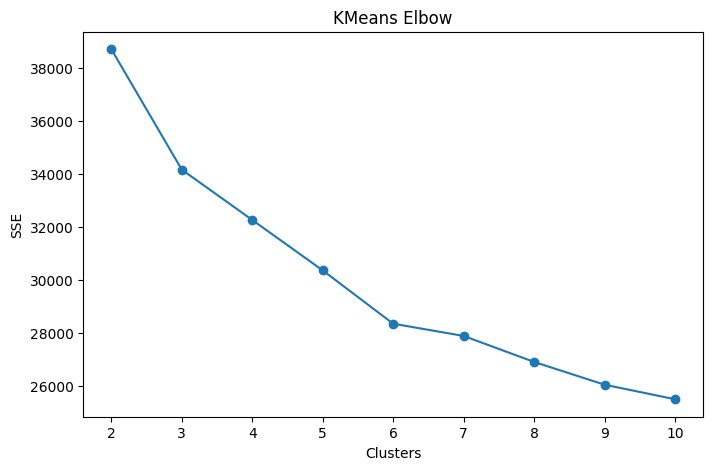

In [113]:
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('KMeans Elbow')
plt.show()

In [114]:
n_clusters = 4 
kmeans_positive = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [115]:
df_churn_positive.loc[:, 'Cluster'] = clusters

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3014/1097356564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_positive.loc[:, 'Cluster'] = clusters


<h2>Silhouette Score</h2>

In [116]:
def kmeans_per_k(data, k_range):
    results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        results.append(kmeans)
    return results

# Define el rango de clusters
k_range = range(2, 10)

# Entrena KMeans para cada valor de k
kmeans_models = kmeans_per_k(X_scaled, k_range)

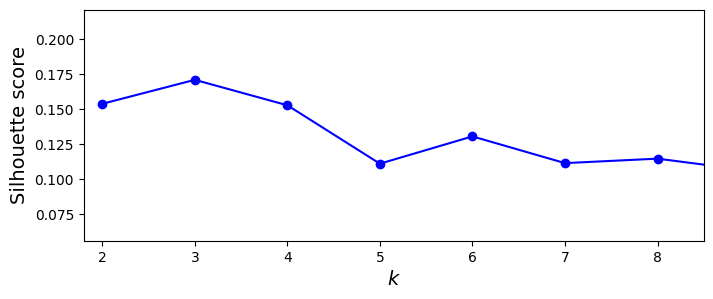

In [117]:
silhouette_scores = [
    silhouette_score(X_scaled, model.labels_) for model in kmeans_models
]

# Graficar las puntuaciones de silueta
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Ajustar dinámicamente los límites de los ejes
plt.axis([1.8, 8.5, min(silhouette_scores) - 0.05, max(silhouette_scores) + 0.05])

# Guardar la figura
plt.savefig("silhouette_score_vs_k_plot.png", dpi=300)
plt.show()

In [118]:
k = 3 
kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [119]:
df_churn_positive = df_churn_positive.copy()
df_churn_positive['Cluster'] = clusters

In [120]:
print(df_churn_positive.groupby('Cluster').describe())

        SeniorCitizen                                              Partner  \
                count      mean       std  min  25%  50%  75%  max   count   
Cluster                                                                      
0               514.0  0.143969  0.351400  0.0  0.0  0.0  0.0  1.0   514.0   
1              1138.0  0.317223  0.465600  0.0  0.0  0.0  1.0  1.0  1138.0   
2               217.0  0.188940  0.392366  0.0  0.0  0.0  0.0  1.0   217.0   

                                                     Dependents            \
             mean       std  min  25%  50%  75%  max      count      mean   
Cluster                                                                     
0        0.245136  0.430587  0.0  0.0  0.0  0.0  1.0      514.0  0.200389   
1        0.355888  0.478992  0.0  0.0  0.0  1.0  1.0     1138.0  0.134446   
2        0.635945  0.482277  0.0  0.0  1.0  1.0  1.0      217.0  0.322581   

                                            tenure                  

In [121]:
cluster_churnpositive = pd.read_csv('./cluster_churnpositive_description.csv')
cluster_churnpositive

,Unnamed: 0,SeniorCitizen,SeniorCitizen.1,SeniorCitizen.2,SeniorCitizen.3,SeniorCitizen.4,SeniorCitizen.5,SeniorCitizen.6,SeniorCitizen.7,Partner,Partner.1,Partner.2,Partner.3,Partner.4,Partner.5,Partner.6,Partner.7,Dependents,Dependents.1,Dependents.2,Dependents.3,Dependents.4,Dependents.5,Dependents.6,Dependents.7,tenure,tenure.1,tenure.2,tenure.3,tenure.4,tenure.5,tenure.6,tenure.7,PhoneService,PhoneService.1,PhoneService.2,PhoneService.3,PhoneService.4,PhoneService.5,PhoneService.6,PhoneService.7,PaperlessBilling,PaperlessBilling.1,PaperlessBilling.2,PaperlessBilling.3,PaperlessBilling.4,PaperlessBilling.5,PaperlessBilling.6,PaperlessBilling.7,MonthlyCharges,MonthlyCharges.1,MonthlyCharges.2,MonthlyCharges.3,MonthlyCharges.4,MonthlyCharges.5,MonthlyCharges.6,MonthlyCharges.7,TotalCharges,TotalCharges.1,TotalCharges.2,TotalCharges.3,TotalCharges.4,TotalCharges.5,TotalCharges.6,TotalCharges.7,gender_Male,gender_Male.1,gender_Male.2,gender_Male.3,gender_Male.4,gender_Male.5,gender_Male.6,gender_Male.7,MultipleLines_Yes,MultipleLines_Yes.1,MultipleLines_Yes.2,MultipleLines_Yes.3,MultipleLines_Yes.4,MultipleLines_Yes.5,MultipleLines_Yes.6,MultipleLines_Yes.7,InternetService_Fiber optic,InternetService_Fiber optic.1,InternetService_Fiber optic.2,InternetService_Fiber optic.3,InternetService_Fiber optic.4,InternetService_Fiber optic.5,InternetService_Fiber optic.6,InternetService_Fiber optic.7,InternetService_No,InternetService_No.1,InternetService_No.2,InternetService_No.3,InternetService_No.4,InternetService_No.5,InternetService_No.6,InternetService_No.7,OnlineSecurity_Yes,OnlineSecurity_Yes.1,OnlineSecurity_Yes.2,OnlineSecurity_Yes.3,OnlineSecurity_Yes.4,OnlineSecurity_Yes.5,OnlineSecurity_Yes.6,OnlineSecurity_Yes.7,OnlineBackup_Yes,OnlineBackup_Yes.1,OnlineBackup_Yes.2,OnlineBackup_Yes.3,OnlineBackup_Yes.4,OnlineBackup_Yes.5,OnlineBackup_Yes.6,OnlineBackup_Yes.7,DeviceProtection_Yes,DeviceProtection_Yes.1,DeviceProtection_Yes.2,DeviceProtection_Yes.3,DeviceProtection_Yes.4,DeviceProtection_Yes.5,DeviceProtection_Yes.6,DeviceProtection_Yes.7,TechSupport_Yes,TechSupport_Yes.1,TechSupport_Yes.2,TechSupport_Yes.3,TechSupport_Yes.4,TechSupport_Yes.5,TechSupport_Yes.6,TechSupport_Yes.7,StreamingTV_Yes,StreamingTV_Yes.1,StreamingTV_Yes.2,StreamingTV_Yes.3,StreamingTV_Yes.4,StreamingTV_Yes.5,StreamingTV_Yes.6,StreamingTV_Yes.7,StreamingMovies_Yes,StreamingMovies_Yes.1,StreamingMovies_Yes.2,StreamingMovies_Yes.3,StreamingMovies_Yes.4,StreamingMovies_Yes.5,StreamingMovies_Yes.6,StreamingMovies_Yes.7,PaymentMethod_Credit card (automatic),PaymentMethod_Credit card (automatic).1,PaymentMethod_Credit card (automatic).2,PaymentMethod_Credit card (automatic).3,PaymentMethod_Credit card (automatic).4,PaymentMethod_Credit card (automatic).5,PaymentMethod_Credit card (automatic).6,PaymentMethod_Credit card (automatic).7,PaymentMethod_Electronic check,PaymentMethod_Electronic check.1,PaymentMethod_Electronic check.2,PaymentMethod_Electronic check.3,PaymentMethod_Electronic check.4,PaymentMethod_Electronic check.5,PaymentMethod_Electronic check.6,PaymentMethod_Electronic check.7,PaymentMethod_Mailed check,PaymentMethod_Mailed check.1,PaymentMethod_Mailed check.2,PaymentMethod_Mailed check.3,PaymentMethod_Mailed check.4,PaymentMethod_Mailed check.5,PaymentMethod_Mailed check.6,PaymentMethod_Mailed check.7,contract_MtoM,contract_MtoM.1,contract_MtoM.2,contract_MtoM.3,contract_MtoM.4,contract_MtoM.5,contract_MtoM.6,contract_MtoM.7,contract_OneYear,contract_OneYear.1,contract_OneYear.2,contract_OneYear.3,contract_OneYear.4,contract_OneYear.5,contract_OneYear.6,contract_OneYear.7,contract_TwoYear,contract_TwoYear.1,contract_TwoYear.2,contract_TwoYear.3,contract_TwoYear.4,contract_TwoYear.5,contract_TwoYear.6,contract_TwoYear.7
0,NaN,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max,count,mean,s

<h2>Cluster Distribution</h2>

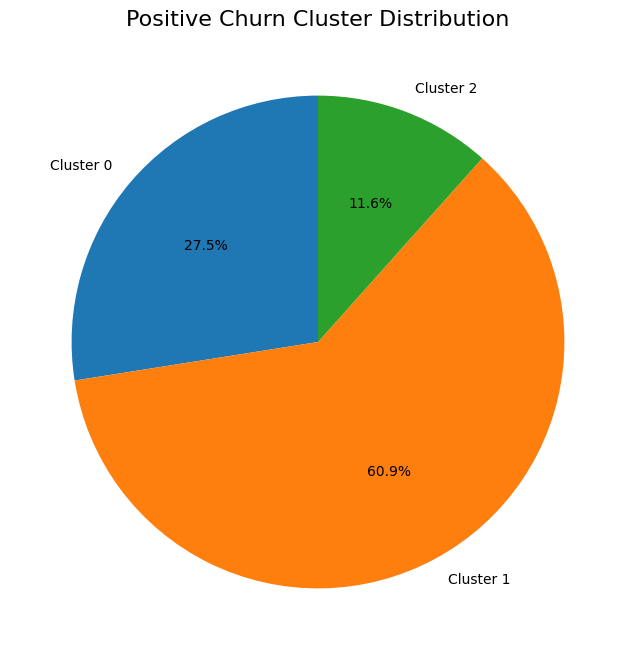

In [122]:
unique, counts = np.unique(clusters, return_counts=True)
cluster_distribution = dict(zip(unique, counts))


# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    counts, 
    labels=[f'Cluster {i}' for i in unique], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab10.colors
)
plt.title('Positive Churn Cluster Distribution', fontsize=16)
plt.show()

<h1>Negative Churn</h1>

In [123]:
churn_negative = df_churn_negative.drop(columns=['Churn'])

In [124]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(churn_negative)

In [125]:
sse = []
range_n_clusters = range(2, 11)  
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

<h2>KMeans Elbow</h2>

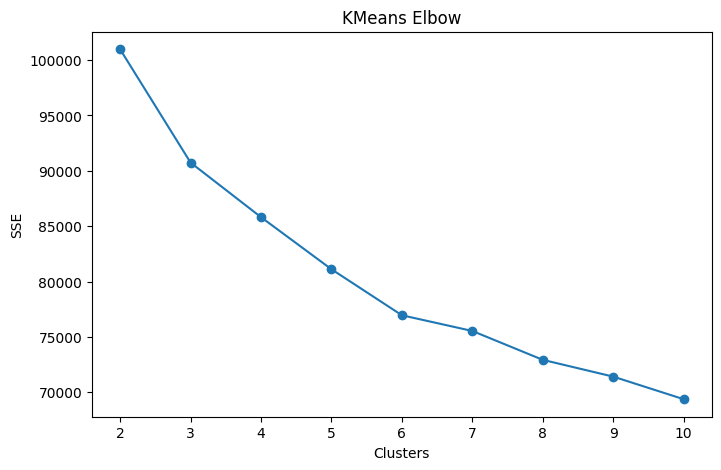

In [126]:
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('KMeans Elbow')
plt.show()

<h2>Silhouette Score</h2>

In [127]:
def kmeans_per_k(data, k_range):
    results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        results.append(kmeans)
    return results

k_range = range(2, 10)

kmeans_models = kmeans_per_k(X_scaled, k_range)

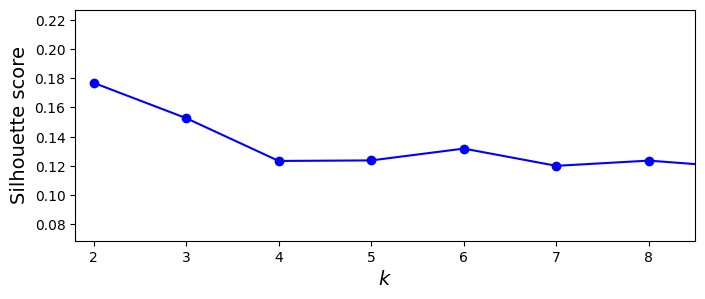

In [128]:
silhouette_scores = [
    silhouette_score(X_scaled, model.labels_) for model in kmeans_models
]

# Graficar las puntuaciones de silueta
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Ajustar dinámicamente los límites de los ejes
plt.axis([1.8, 8.5, min(silhouette_scores) - 0.05, max(silhouette_scores) + 0.05])

# Guardar la figura
plt.savefig("silhouette_score_vs_k_plot.png", dpi=300)
plt.show()

In [129]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=42)
clustersN = kmeans.fit_predict(X_scaled)

In [130]:
df_churn_negative = df_churn_negative.copy()
df_churn_negative['Cluster'] = clustersN

In [131]:
print(df_churn_negative.groupby('Cluster').describe())

        SeniorCitizen                                              Partner  \
                count      mean       std  min  25%  50%  75%  max   count   
Cluster                                                                      
0              2420.0  0.188017  0.390806  0.0  0.0  0.0  0.0  1.0  2420.0   
1              2754.0  0.076616  0.266029  0.0  0.0  0.0  0.0  1.0  2754.0   

                                                     Dependents            \
             mean       std  min  25%  50%  75%  max      count      mean   
Cluster                                                                     
0        0.653719  0.475882  0.0  0.0  1.0  1.0  1.0     2420.0  0.345868   
1        0.417938  0.493309  0.0  0.0  0.0  1.0  1.0     2754.0  0.343863   

                                            tenure                             \
              std  min  25%  50%  75%  max   count       mean        std  min   
Cluster                                                      

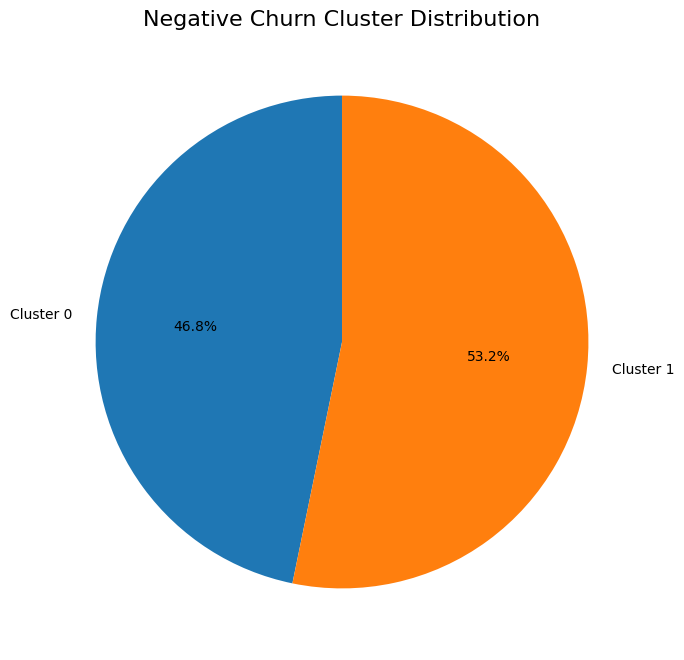

In [132]:
unique, counts = np.unique(clustersN, return_counts=True)
cluster_distribution = dict(zip(unique, counts))


# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    counts, 
    labels=[f'Cluster {i}' for i in unique], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab10.colors
)
plt.title('Negative Churn Cluster Distribution', fontsize=16)
plt.show()